In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [68]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/Ice_cream selling data.csv")
df = df.rename(columns={'Temperature (°C)': 'temp', 'Ice Cream Sales (units)': 'sale'})

df.head()

,temp,sale
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


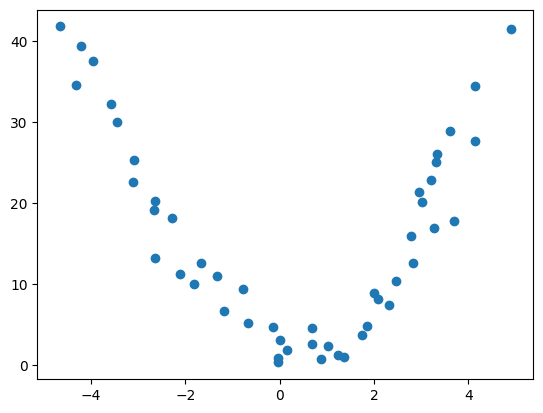

In [69]:
plt.scatter(df["temp"],df["sale"])  ## in the plot we czn clearly see the relation is not att all linear

In [70]:
X = df[["temp"]]
y = df["sale"]

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12,shuffle=True)

print(X_train.shape)
print(X_test.shape)


(36, 1)
(13, 1)


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Linear regression

In [73]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

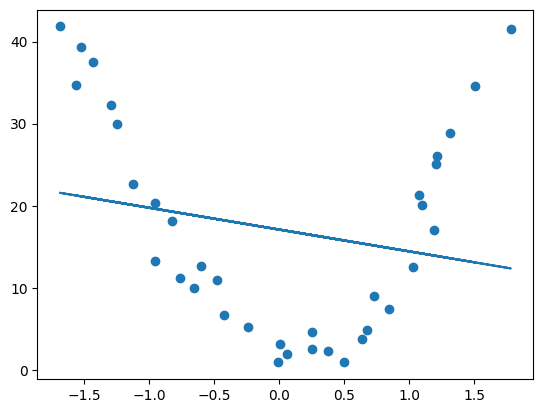

In [74]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [75]:
y_pred = regression.predict(X_test)

In [76]:
from sklearn.metrics import r2_score
score = r2_score(y_true=y_test,y_pred=y_pred)

In [77]:
score
## An R² (coefficient of determination) score can be negative if your model performs worse than a baseline model 
## that always predicts the mean of the target values.

-0.2519959342136464

### Polynomial Regression

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True)  ## include baise bascally caculate for constant term 

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [79]:

print(X_test_poly[0])

[1.         1.50279629 2.25839668 3.39391014]


In [80]:
poly_regression = LinearRegression(n_jobs=-1)
poly_regression.fit(X_train_poly,y_train)

LinearRegression(n_jobs=-1)

In [81]:
y_pred = poly_regression.predict(X_test_poly)
score = r2_score(y_true=y_test,y_pred=y_pred)

score

0.8524756467846769

In [82]:
X_new = np.linspace(-5,5,200).reshape(200,1)  ## linespace crete 200 spaces between [-5,5] and reshape function reshape it
X_new = scaler.transform(X_new)
X_new_poly = poly.transform(X_new)

y_new = poly_regression.predict(X_new_poly)


/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


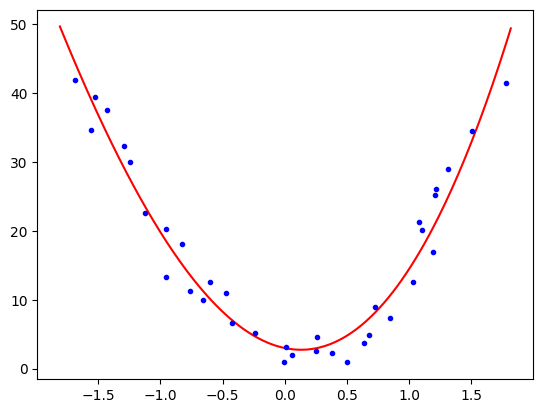

In [83]:
plt.plot(X_new,y_new,"r-")
plt.plot(X_train,y_train,"b.")

### Pipeline in polynomial

A pipeline in machine learning, is a way to streamline the workflow of data preprocessing and model training. It ensures that multiple sequential steps are performed consistently

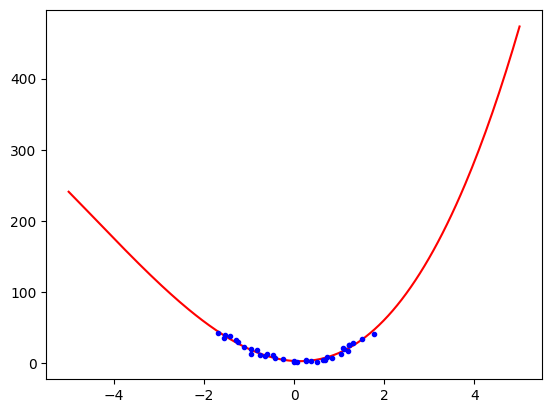

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_new = np.linspace(-5,5,200).reshape(200,1)

def poly_regression(deg):
    poly = PolynomialFeatures(degree=deg,include_bias=True)
    regression = LinearRegression(n_jobs=-1)

    pipeline = Pipeline(
        [
            ("poly-features",poly),
            ("linear-reg",regression)
        ]
    )

    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_new)
    plt.plot(X_new,y_pred,"r-")
    plt.plot(X_train,y_train,"b.")


poly_regression(3)

    


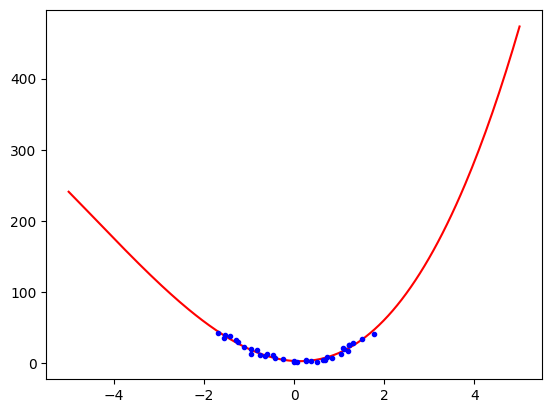

In [85]:
poly_regression(3)